In [1030]:
%config IPCompleter.greedy=True
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [1031]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold 
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder

In [1032]:
URL = "https://raw.githubusercontent.com/oscar-unir/TIA/main/Laboratorio_dataset_car.csv"
df = pd.read_csv(URL, sep = ";")
#df = pd.read_csv("Laboratorio_dataset_car.csv", sep=";")

In [1033]:
df.head()

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### PREPOCESAMIENTO DE DATOS

Tenemos un dataset con los datos de tipos de vehículos donde existen los siguientes aributos: 

- buying: Precio del coche. Valores: vhigh, high, med, low.
- maint: Precio de mantenimiento. Valores: vhigh, high, med, low.
- doors: Número de puertas. Valores: 2, 3, 4, 5more.
- persons: Número de pasajeros. Valores: 2, 4, more.
- lug_boot: Tamaño del maletero. Valores: small, med, big.
- safety: Seguridad del coche. Valores: high, med, low

y la variable de clase es: 
- class: indica si el coche es aceptable o no.

Hacemos un resumen de los estadísticos

In [1034]:
# Vemos que tenemos 1750 filas y 7 columnas.
df.shape

(1750, 7)

In [1035]:
df.describe()

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
count,1750,1750,1750,1750,1750,1750,1750
unique,4,4,4,3,3,3,4
top,vhigh,low,2,4,big,high,unacc
freq,443,447,444,587,585,590,1215


▸	Número de clases, indicando que representan dichas clases y el tipo de valor que toman.    

In [1036]:
n_clases= df["class"].unique().tolist()
n_clases

['unacc', 'acc', 'vgood', 'good']

Las clases indican la valoración final del vehículo pudiendo tener los siguientes valores:

- unacc: inaceptables
- acc: aceptables
- vgood: muy bueno
- good: bueno

Será nuestra variable objetivo.

▸	Número de instancias en total.

In [1037]:
df["Buying"].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [1038]:
all_columns_list = df.columns.values.tolist()
#df["Buying"].unique().tolist()
for i in range(len(all_columns_list)):
    print(df[all_columns_list[i]].unique().tolist())

['vhigh', 'high', 'med', 'low']
['vhigh', 'high', 'med', 'low']
['2', '3', '4', '5more']
['2', '4', 'more']
['small', 'med', 'big']
['low', 'med', 'high']
['unacc', 'acc', 'vgood', 'good']


▸	Número de instancias pertenecientes a cada clase.

In [1039]:
for i in range(len(all_columns_list)):
    print(df[all_columns_list[i]].value_counts())

vhigh    443
med      438
low      437
high     432
Name: Buying, dtype: int64
low      447
vhigh    437
med      434
high     432
Name: Maintenance, dtype: int64
2        444
5more    437
3        435
4        434
Name: Doors, dtype: int64
4       587
more    585
2       578
Name: Person, dtype: int64
big      585
med      583
small    582
Name: lug_boot, dtype: int64
high    590
med     582
low     578
Name: safety, dtype: int64
unacc    1215
acc       390
good       75
vgood      70
Name: class, dtype: int64


▸	Número de atributos de entrada, su significado y tipo.

In [1040]:
# sacamos del dataset a la clase para obtener solo los atributos
df_atributos = df.drop("class", axis=1)
df_atributos.columns.tolist()

['Buying', 'Maintenance', 'Doors', 'Person', 'lug_boot', 'safety']

Nuestras atributos y sus significados son las siguientes:

- Buying: indica el precio del vehículo.
- Maintenance: indica si el precio de mantenimiento.
- Doors: número de puertas del vehículo.
- Person: indica el número de pasajeros que puede transportar el vehículo.
- lug_boot: nos indica el tamaño del maletero.
- safety: indica el nivel de seguridad del vehículo.

In [1041]:
df_atributos.dtypes

Buying         object
Maintenance    object
Doors          object
Person         object
lug_boot       object
safety         object
dtype: object

Y todos son de tipo object, incluso los atributos "Doors" y "Person" al no tener unicamente estos valores numéricos ('more').

▸	¿Hay algún valor de atributo desconocido?

In [1042]:
df.isnull().values.any()

False

Vemos que no tenemos valores nulos.

## EVALUACIÓN DE ALGORITMOS

Para la evaluación de los algoritmos primero vamos a pasar las instancias a formato one-hot encoding

In [1043]:
for i in range(len(all_columns_list)):
    df[all_columns_list[i]] = pd.factorize(df[all_columns_list[i]])[0]
df

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...
1745,3,3,3,2,1,2,2
1746,3,3,3,2,1,2,2
1747,3,3,3,2,2,0,0
1748,3,3,3,2,2,1,3


dummies = pd.get_dummies(df)
dummies

array_dummies = dummies.values
array_dummies

X = array_dummies[:, 0:6]
y = array_dummies[:, 6]

In [1044]:
array_df = df.values

X = array_df[:, 0:6]
y = array_df[:, 6]

In [1045]:
# Distribuimos los valores como hemos dicho las diferentes variables:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, shuffle = True)

In [1046]:
# Comprobamos que tenemos la proporción de 80-20:
print("X_train:", X_train.shape, ", X_test:", X_test.shape)
print("y_train:", y_train.shape, ", y_test:", y_test.shape)

X_train: (1400, 6) , X_test: (350, 6)
y_train: (1400,) , y_test: (350,)


In [1047]:
# importamos los algoritmos a probar
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [1048]:
# Cargamos los algoritmos
models = []

# LogisticRegression
models.append(("LR", LogisticRegression(solver="liblinear", multi_class="ovr")))
'''Tras probar varios los parámetros no se han encontrado cambios significativos en los resultados tras probar con ellos.'''

# DecisionTreeClassifier (CART) con método de selección de atributos: indice Gini por defecto.
models.append(('CART', DecisionTreeClassifier()))
# DecisionTreeClassifier (ID3) con método de selección de atributos: Entropia.
models.append(('ID.3', DecisionTreeClassifier(criterion="entropy")))
'''Tras probar todos los parámetros no se han encontrado cambios en los resultados tras probar con ellos. Tampoco existe cambio
alguno al cambiar el tipo de método de selección de atributos'''

# Stacking
# tupla con los estimadores que usaremos en el Stacking
estimators = [("LR", LogisticRegression(solver="liblinear", multi_class="ovr")),('CART', DecisionTreeClassifier())]
kfold = StratifiedKFold(n_splits=10, random_state=None)
# Stacking con algoritmo de salida - Regresión LOgistica
models.append(("Stacking_LR", StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=kfold)))
# Stacking con algoritmo de salida - CART
models.append(("Stacking_CART", StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier(), cv=kfold)))
'''En este caso se aprecia un muy pequeño cambio si usamos un algoritmo u otra para la salida de nuestro Stacking así como si
modificamos la estrategia de validación cruzada vemos que con un número de division de 10 en el segundo caso mejora la precision
del 74% al 76%'''

# Bagging (base_estimator=None->Arbol de decisiones)
models.append(("Bagging_DecisionTreeClassifier", BaggingClassifier(DecisionTreeClassifier(),n_estimators = 10,random_state = 25)))
models.append(("Bagging_LogisticRegression", BaggingClassifier(LogisticRegression(solver="liblinear", multi_class="ovr"),n_estimators = 100,random_state = 0)))
'''Se aprecia un pequeño cambio al modificar el número de estimadores mejorando la precisión según se disminuye este. Tampoco existe cambio al cambiar el tipo de algoritmo'''

# RandomForestClassifier - equivalente a BaggingClassifier con el parámetreo base_estimatos = None
models.append(("Bagging_RandomForestClassifier", RandomForestClassifier(n_estimators=10, random_state= 1, max_depth = 100)))

In [1049]:
# evaluamos cada modelo por turnos
results = []
names =[]
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: Media: %f - Desviación estándas: %f' % (name, cv_results.mean(), cv_results.std()))

LR: Media: 0.769286 - Desviación estándas: 0.018640
CART: Media: 0.977143 - Desviación estándas: 0.011429
ID.3: Media: 0.981429 - Desviación estándas: 0.008571
Stacking_LR: Media: 0.978571 - Desviación estándas: 0.009583
Stacking_CART: Media: 0.964286 - Desviación estándas: 0.014639
Bagging_DecisionTreeClassifier: Media: 0.978571 - Desviación estándas: 0.011518
Bagging_LogisticRegression: Media: 0.770000 - Desviación estándas: 0.019640
Bagging_RandomForestClassifier: Media: 0.960714 - Desviación estándas: 0.007319


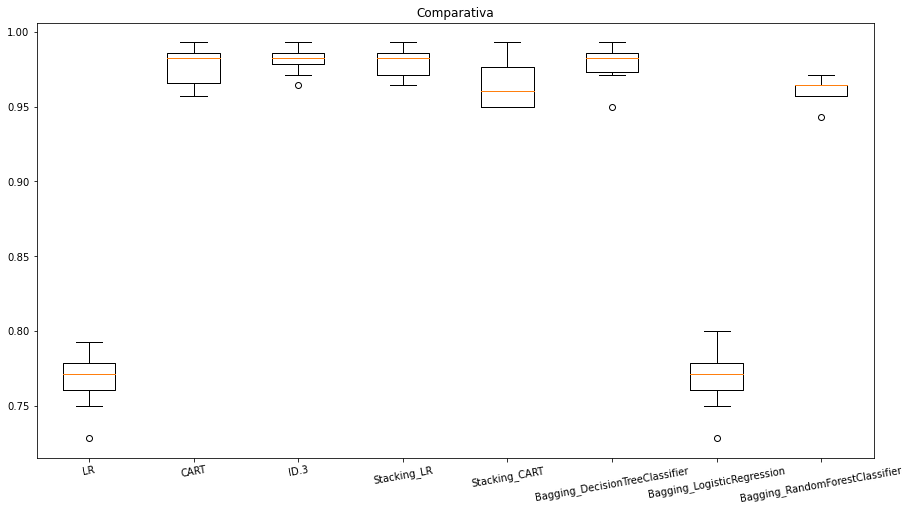

In [1051]:
# comparación de algorítmos
plt.figure(figsize=(15,8))
plt.boxplot(results, labels=names)
plt.title("Comparativa")
plt.xticks(rotation=10)
plt.show()

Podemos observar que tanto el algoritmo LR como el Bagging_LogisticRegression tiene un bajo accuracy frente al resto. 

Los más balanceados o con menos desviaciones parecen ser el ID.3 y el Stacking_CART, teniendo muy buenos valores el CART y el Stacking_LR. Bagging_DecisionTreeClassifier tiene buena accuracy y poca desviaciones pero podemos observar valores por debajo del mínimo fuera del rango.

Para el cálculo de las predicciones vamos a tomar los tres con mayor accuracy, es decir: 

- ID.3: Media: 0.979286 - Desviación estándas: 0.011271
- Bagging_DecisionTreeClassifier: Media: 0.978571 - Desviación estándas: 0.011518
- Stacking_LR: Media: 0.976429 - Desviación estándas: 0.010127

### Predicciones

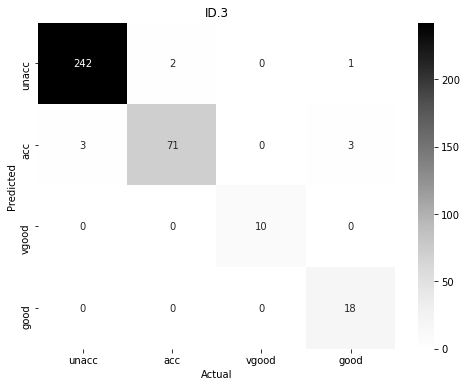

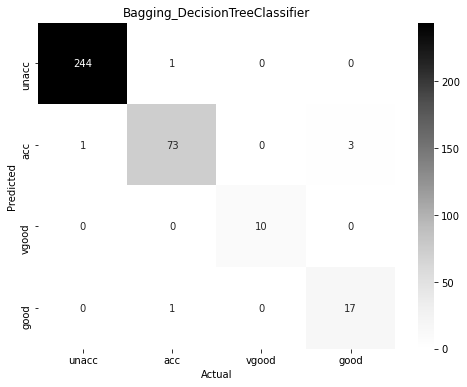

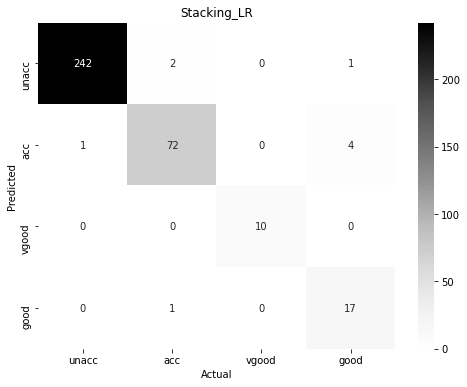

In [1103]:
models_pred = []
models_pred.append(('ID.3', DecisionTreeClassifier(criterion="entropy")))
models_pred.append(("Bagging_DecisionTreeClassifier", BaggingClassifier(DecisionTreeClassifier(),n_estimators = 10,random_state = 25)))
models_pred.append(("Stacking_LR", StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=kfold)))

from sklearn.metrics import confusion_matrix
import seaborn as sns

for name, model in models_pred:
    labels = ['unacc', 'acc', 'vgood', 'good']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    names.append(name)
    
    plt.figure( figsize=(8,6))
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,# PASAMOS LOS DATOS GENERADOS
            annot=True, # QUEREMOS QUE HAGA ANOTACIONES (PONGA EL VALOR EN LAS CELDAS)
            fmt='d', # FORMATO EN DIGITOS NO FLOTANTES
            xticklabels=labels,
            yticklabels=labels,
            cmap='Greys', 
            )
    plt.title(name)
    plt.ylabel('Predicted')
    plt.xlabel('Actual');
  
    print(" ")

In [1105]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9742857142857143
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       245
           1       0.96      0.94      0.95        77
           2       1.00      1.00      1.00        10
           3       0.77      0.94      0.85        18

    accuracy                           0.97       350
   macro avg       0.93      0.97      0.95       350
weighted avg       0.98      0.97      0.97       350



### Sensibilidad - Recall o true positive rate (TPR) 

Porcentaje de casos positivos correctamente clasificados
$$TPR=\frac{TP}{TP+FN}$$

In [1108]:
from sklearn.metrics import recall_score
# TP Rate (instancias positivas clasificadas correctamente)
sensibilidad = recall_score(y_test, y_pred)
sensibilidad

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

### Precision (PPV)

Porcentaje de realmente correctos a partir de los casos clasificados como correctos
$$PPV=\frac{TP}{TP+FP}$$

In [859]:
# 
PPV = TP/(TP+FP)
PPV

0.9038461538461539

- TPR alto con un PPV bajo indica que la mayoría de los casos positivos son clasificados correctamente, pero hay muchos falsos positivos.
- TPR bajo con PPV alto indica que la predicción fallo muchos casos positivos, pero los que clasificamos como positivos muy probablemente sean positivos.

### Accuracy (ACC) (exactitud)

Porcentaje de predicciones correctas
$$ACC=\frac{TP+TN}{TP+TN+FP+FN}$$

In [860]:
# Instancias clasificadas correctamente (accuracy) TPR
exactitud = accuracy_score(y_test, y_pred)
exactitud

0.74

### F-measure
Media armonica de TPR y PPV. (La media armonica penaliza más que la media aritmetica si uno de los valores es muy alto o muy bajo. Lo que busca es que sean parecidos.

$$Fmeasure=\frac{2 \times TPR \times PPV}{TPR+PPV}$$

# PRUEBAS

In [861]:
from sklearn.metrics import confusion_matrix
model = LogisticRegression(solver="liblinear", multi_class="ovr")
print(model)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
print(cm)

LogisticRegression(multi_class='ovr', solver='liblinear')
0.7428571428571429
[[260   0]
 [ 90   0]]


In [862]:
from sklearn.metrics import confusion_matrix
model = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier(), cv=kfold)
print(model)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
print(cm)

StackingClassifier(cv=StratifiedKFold(n_splits=10,
        random_state=RandomState(MT19937) at 0x21A69700940, shuffle=False),
                   estimators=[('LR',
                                LogisticRegression(multi_class='ovr',
                                                   solver='liblinear')),
                               ('CART', DecisionTreeClassifier())],
                   final_estimator=DecisionTreeClassifier())
0.7428571428571429
[[260   0]
 [ 90   0]]


In [863]:
from sklearn.metrics import confusion_matrix
model = RandomForestClassifier(n_estimators=500, random_state= 1, max_depth = 10, criterion= "entropy")
print(model)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
print(cm)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500,
                       random_state=1)
0.7428571428571429
[[260   0]
 [ 90   0]]
